In [1]:
## PART 2
import pandas as pd


df = pd.read_csv('troop_movements.csv')

df.head()



,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld
0,2025-07-08 14:15:24,1,tie_silencer,resistance,3,10,6,7,Iktotch
1,2025-07-08 14:15:23,2,at-st,empire,7,7,2,4,Eriadu
2,2025-07-08 14:15:22,3,at-st,resistance,5,5,6,2,Malastare
3,2025-07-08 14:15:21,4,at-st,empire,6,3,10,8,Corellia
4,2025-07-08 14:15:20,5,unknown,empire,9,7,3,10,Naboo


In [2]:
df["empire_or_resistance"].value_counts().reset_index()
 

,empire_or_resistance,count
0,resistance,513
1,empire,487


In [3]:
df["homeworld"].value_counts().reset_index()

,homeworld,count
0,Iktotch,33
1,Glee Anselm,33
2,Kalee,32
3,Haruun Kal,32
4,Vulpter,31
5,Tatooine,31
6,Zolan,30
7,Naboo,29
8,Umbara,29
9,Chandrila,28


In [4]:
df['unit_type'].value_counts().reset_index()

,unit_type,count
0,x-wing,141
1,tie_fighter,133
2,unknown,128
3,at-at,124
4,stormtrooper,124
5,at-st,123
6,resistance_soldier,116
7,tie_silencer,111


In [5]:
df['is_resistance'] = df['empire_or_resistance'] == 'resistance'
df.head()

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld,is_resistance
0,2025-07-08 14:15:24,1,tie_silencer,resistance,3,10,6,7,Iktotch,True
1,2025-07-08 14:15:23,2,at-st,empire,7,7,2,4,Eriadu,False
2,2025-07-08 14:15:22,3,at-st,resistance,5,5,6,2,Malastare,True
3,2025-07-08 14:15:21,4,at-st,empire,6,3,10,8,Corellia,False
4,2025-07-08 14:15:20,5,unknown,empire,9,7,3,10,Naboo,False


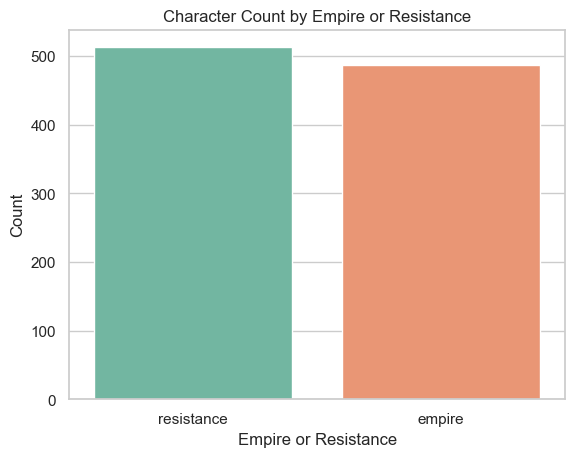

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

ep_data = df["empire_or_resistance"].value_counts().reset_index()
sns.set_theme(style="whitegrid")
sns.barplot(data=ep_data, x='empire_or_resistance', y='count', palette="Set2", hue="empire_or_resistance")
plt.title('Character Count by Empire or Resistance')
plt.xlabel('Empire or Resistance')
plt.ylabel('Count')
plt.show()

In [48]:
import sklearn
import sklearn.tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

le = LabelEncoder()

df_dummy = pd.get_dummies(df[['homeworld', 'unit_type']])

X = df_dummy
y = df['empire_or_resistance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

dtc = sklearn.tree.DecisionTreeClassifier()
dtc.fit(X_train, y_train)

preditction = dtc.predict(X_test)
print(accuracy_score(y_test, preditction))



0.63


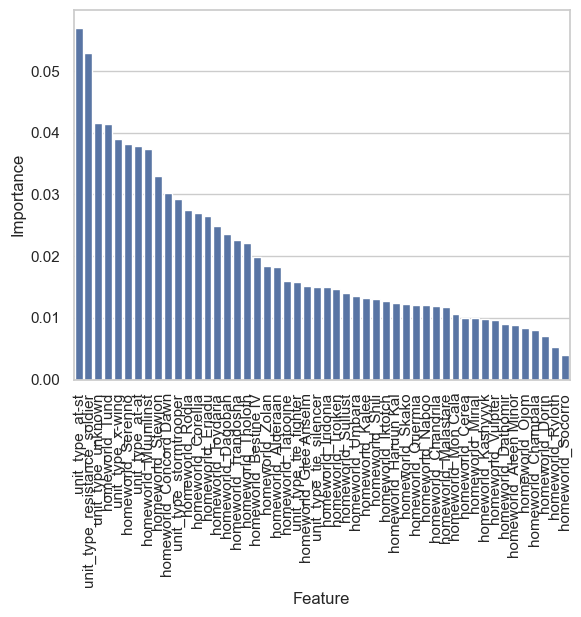

In [70]:
importances = dtc.feature_importances_

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})
feature_importances = feature_importances.sort_values(by='Importance',ascending=False)
sns.set_theme(style="whitegrid")
sns.barplot(feature_importances, x='Feature', y='Importance')

plt.xticks(rotation=90)
plt.show()



In [9]:
import pickle

with open('trained_model.pkl', 'wb') as f:
    pickle.dump(dtc, f)

# Part 3

In [37]:
troops_1m = pd.read_csv('troop_movements_1m.csv')
troops_1m.head()

,timestamp,unit_id,unit_type,location_x,location_y,destination_x,destination_y,homeworld
0,2023-06-03 03:19:15,919214,tie_silencer,2.0,5.0,9,3,Aleen Minor
1,2023-02-24 13:50:40,9467154,stormtrooper,9.0,0.0,9,1,Malastare
2,2023-03-29 19:54:55,6585778,tie_silencer,0.0,6.0,5,9,Serenno
3,2023-04-30 00:58:11,3878023,tie_silencer,4.0,2.0,9,9,Tund
4,2023-04-10 22:00:26,5537117,at-st,6.0,8.0,5,8,Skako


In [38]:
troops_1m['unit_type'] = troops_1m['unit_type'].apply(
    lambda x: 'unknown' if x == 'invalid_unit' else x
)
troops_1m = troops_1m.bfill()

In [39]:
troops_1m.to_parquet('troop_movements_1m.parquet')

In [42]:
with open('trained_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
cleaned_troops_1m = pd.read_parquet('troop_movements_1m.parquet')

In [46]:
df_dummy = pd.get_dummies(cleaned_troops_1m[['homeworld', 'unit_type']])

X = df_dummy

cleaned_troops_1m['predictions'] = loaded_model.predict(X)
cleaned_troops_1m.head()

,timestamp,unit_id,unit_type,location_x,location_y,destination_x,destination_y,homeworld,predictions
0,2023-06-03 03:19:15,919214,tie_silencer,2.0,5.0,9,3,Aleen Minor,empire
1,2023-02-24 13:50:40,9467154,stormtrooper,9.0,0.0,9,1,Malastare,resistance
2,2023-03-29 19:54:55,6585778,tie_silencer,0.0,6.0,5,9,Serenno,empire
3,2023-04-30 00:58:11,3878023,tie_silencer,4.0,2.0,9,9,Tund,empire
4,2023-04-10 22:00:26,5537117,at-st,6.0,8.0,5,8,Skako,empire
